In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'size'   : 22}
rc('font', **font)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rc('text', usetex=True)
plt.rcParams['font.family']='Computer Modern'
import scipy.stats as st
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

This notebook produces the first Figure of the paper where we show the jet mass dependence with respect with the invariant mass of the event through the $\Delta^{ab}_{c}$

# Dir definition

In [2]:
WPs_dir='training/'

In [3]:
results_dir='plots/'

In [4]:
y_together = np.load('y_RandD.npy')
labels_together = np.load('labels_RandD.npy')
x_together = np.load('x_RandD.npy')
x_together[:,0]=x_together[:,0]#-x_together[:,1]
nB = np.sum(labels_together==0.0)
print(nB)
x_sim = np.load('x_BB1.npy')
x_sim[:,0]=x_sim[:,0]#-x_sim[:,1]
y_sim = np.load('y_BB1.npy')
labels_sim = np.load('labels_BB1.npy')
x_sim=x_sim[labels_sim==0.0]
y_sim=y_sim[labels_sim==0.0]

999899


# Effect comparison

In [5]:
nS = np.sum(labels_together==1.0)#
print(nB,nS)
y_together_bis=y_together[:nB+nS]
labels_together_bis=labels_together[:nB+nS]
x_together_bis=x_together[:nB+nS]    
scaler = StandardScaler()
x_together_bis = x_together_bis
x_sim_bis = x_sim
y_together_bis = y_together_bis
y_sim_bis = y_sim

# same as 2009.02205
y_low = 3100.0
y_high = 3900.0

x_together_bis=x_together_bis[y_together_bis>=y_low]
labels_together_bis=labels_together_bis[y_together_bis>=y_low]
y_together_bis=y_together_bis[y_together_bis>=y_low]

x_sim_bis = x_sim_bis[y_sim_bis>=y_low]
y_sim_bis = y_sim_bis[y_sim_bis>=y_low]

x_together_bis=x_together_bis[y_together_bis<=y_high]
labels_together_bis=labels_together_bis[y_together_bis<=y_high]
y_together_bis=y_together_bis[y_together_bis<=y_high]

x_sim_bis = x_sim_bis[y_sim_bis<=y_high]
y_sim_bis = y_sim_bis[y_sim_bis<=y_high]
    
y_nbins=10 # chosen to get enough statistics
y_bins = np.array([np.quantile(y_together_bis,i*1.0/(y_nbins-1)) for i in range(y_nbins) ])
    
print(np.sum(labels_together_bis)/len(labels_together_bis),len(labels_together_bis))
    
SR_min = 3300.0
SR_max = 3700.0
bins_SR = [np.argmin(np.abs(y_bins-SR_min)),np.argmin(np.abs(y_bins-SR_max))]
SR = [y_bins[np.argmin(np.abs(y_bins-SR_min))],y_bins[np.argmin(np.abs(y_bins-SR_max))]]
SR_min = SR[0]
SR_max = SR[1]
labels_mixture_together = np.array([1 if a and b else 0 for a,b in zip(y_together_bis>SR[0],y_together_bis<=SR[1])])
labels_sim_mixture = np.array([1 if a and b else 0 for a,b in zip(y_sim_bis>SR[0],y_sim_bis<=SR[1])])

bins_SR = [np.argmin(np.abs(y_bins-SR_min)),np.argmin(np.abs(y_bins-SR_max))]

x_train = np.vstack([x_together_bis,x_sim_bis])#x_together_bis
y_train = np.hstack([labels_mixture_together,labels_sim_mixture])#labels_mixture_together

999899 99969
0.26588432474100376 342476


Get the total average mass per class

In [6]:
m1_avg_bkg = np.mean(x_together_bis[labels_together_bis==0.0,0])
print(m1_avg_bkg)
m2_avg_bkg = np.mean(x_together_bis[labels_together_bis==0.0,1])
print(m2_avg_bkg)

m1_avg_sig = np.mean(x_together_bis[labels_together_bis==1.0,0])
print(m1_avg_sig)
m2_avg_sig = np.mean(x_together_bis[labels_together_bis==1.0,1])
print(m2_avg_sig)

306.28461152632104
135.05326403307006
482.6729102881045
129.7354291229767


Get the relative error

In [7]:
m1_err_bkg = np.std(x_together_bis[labels_together_bis==0.0,0])/np.sum(labels_together_bis==0.0)
print(m1_err_bkg)
m2_err_bkg = np.std(x_together_bis[labels_together_bis==0.0,1])/np.sum(labels_together_bis==0.0)
print(m2_err_bkg)

m1_err_sig = np.std(x_together_bis[labels_together_bis==1.0,0])/np.sum(labels_together_bis==1.0)
print(m1_err_sig)
m2_err_sig = np.std(x_together_bis[labels_together_bis==1.0,1])/np.sum(labels_together_bis==1.0)
print(m2_err_sig)

0.0006982518687222432
0.0003739930127349614
0.0011550902097561943
0.0006784697612665457


Get the average mass per bin per class

In [8]:
m1_per_bin_bkg = np.zeros(len(y_bins)-1)
m2_per_bin_bkg = np.zeros(len(y_bins)-1)

m1_per_bin_sig = np.zeros(len(y_bins)-1)
m2_per_bin_sig = np.zeros(len(y_bins)-1)

for nbin in range(len(y_bins)-1):
    indexes = np.array([a and b for a,b in zip(y_together_bis>=y_bins[nbin],y_together_bis<y_bins[nbin+1])])
    m1_per_bin_bkg[nbin] = np.mean(x_together_bis[indexes][labels_together_bis[indexes]==0.0,0])
#     print(m1_per_bin_bkg[nbin])
    m2_per_bin_bkg[nbin] = np.mean(x_together_bis[indexes][labels_together_bis[indexes]==0.0,1])
#     print(m2_per_bin_bkg[nbin])

    m1_per_bin_sig[nbin] = np.mean(x_together_bis[indexes][labels_together_bis[indexes]==1.0,0])
#     print(m1_avg_sig)
    m2_per_bin_sig[nbin] = np.mean(x_together_bis[indexes][labels_together_bis[indexes]==1.0,1])
#     print(m2_avg_sig)

Get the relative error

In [9]:
err_m1_per_bin_bkg = np.zeros(len(y_bins)-1)
err_m2_per_bin_bkg = np.zeros(len(y_bins)-1)

err_m1_per_bin_sig = np.zeros(len(y_bins)-1)
err_m2_per_bin_sig = np.zeros(len(y_bins)-1)

for nbin in range(len(y_bins)-1):
    indexes = np.array([a and b for a,b in zip(y_together_bis>=y_bins[nbin],y_together_bis<y_bins[nbin+1])])
    err_m1_per_bin_bkg[nbin] = np.std(x_together_bis[indexes][labels_together_bis[indexes]==0.0,0])/np.sum(labels_together_bis[indexes]==0.0)
#     print(err_m1_per_bin_bkg[nbin])
    err_m2_per_bin_bkg[nbin] = np.std(x_together_bis[indexes][labels_together_bis[indexes]==0.0,1])/np.sum(labels_together_bis[indexes]==0.0)
#     print(m2_per_bin_bkg[nbin])

    err_m1_per_bin_sig[nbin] = np.std(x_together_bis[indexes][labels_together_bis[indexes]==1.0,0])/np.sum(labels_together_bis[indexes]==1.0)
#     print(m1_avg_sig)
    err_m2_per_bin_sig[nbin] = np.std(x_together_bis[indexes][labels_together_bis[indexes]==1.0,1])/np.sum(labels_together_bis[indexes]==1.0)
#     print(m2_avg_sig)

Get the error in each Delta

In [10]:
err_delta_1_per_bin_bkg = np.zeros(len(y_bins)-1)
err_delta_2_per_bin_bkg = np.zeros(len(y_bins)-1)

err_delta_1_per_bin_sig = np.zeros(len(y_bins)-1)
err_delta_2_per_bin_sig = np.zeros(len(y_bins)-1)

for nbin in range(len(y_bins)-1):
    indexes = np.array([a and b for a,b in zip(y_together_bis>=y_bins[nbin],y_together_bis<y_bins[nbin+1])])
    print(np.sum(indexes),np.sum(labels_together_bis[indexes]==0.0),np.sum(labels_together_bis[indexes]==1.0))

    err_delta_1_per_bin_bkg[nbin] = (m1_per_bin_bkg[nbin]/m1_avg_bkg) * np.sqrt((err_m1_per_bin_bkg[nbin]/m1_per_bin_bkg[nbin])**2+(m1_err_bkg/m1_avg_bkg)**2)
    err_delta_2_per_bin_bkg[nbin] = (m2_per_bin_bkg[nbin]/m2_avg_bkg) * np.sqrt((err_m2_per_bin_bkg[nbin]/m2_per_bin_bkg[nbin])**2+(m2_err_bkg/m2_avg_bkg)**2)

    err_delta_1_per_bin_sig[nbin] = (m1_per_bin_sig[nbin]/m1_avg_bkg) * np.sqrt((err_m1_per_bin_sig[nbin]/m1_per_bin_sig[nbin])**2+(m1_err_bkg/m1_avg_bkg)**2)
    err_delta_2_per_bin_sig[nbin] = (m2_per_bin_sig[nbin]/m2_avg_bkg) * np.sqrt((err_m2_per_bin_sig[nbin]/m2_per_bin_sig[nbin])**2+(m2_err_bkg/m2_avg_bkg)**2)



38053 36125 1928
38053 34748 3305
38053 31983 6070
38053 27299 10754
38052 22379 15673
38053 19645 18408
38053 20677 17376
38053 25820 12233
38052 32740 5312


In [11]:
mycolors = [(1., 0.4, 0.0), (0.655728, 0.8, 0.),
   (0., 0.742291, 0.873126), (1., 0.656408, 0.), 
   (0.893126, 0.4, 0.767184), 
   (0.295048, 0.8, 0.286932), 
   (0.238758, 0.610466, 1.), (1., 0.325204, 0.406504),
    (0., 0.786874, 0.739379), (1., 0.520437, 0.), 
   (0.7529330319872088, 0.4176501130047967, 1.), 
   (0.5572809000084149, 0.8, 0), 
   (1., 0.06811595600706821, 0.0851449450088353), (0, 0.7226017980018511, 0.9321946059944466), 
   (1., 0.7154761789941944, 0)];

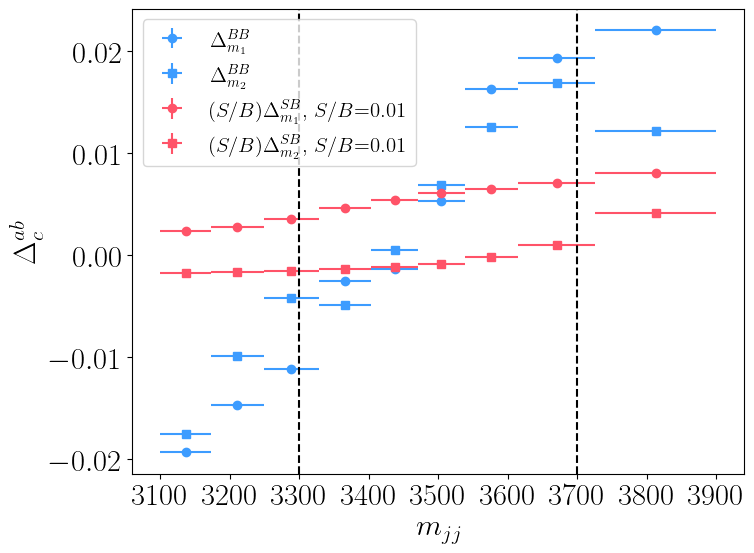

In [12]:
plt.figure(figsize=(2*4,2*3))
plt.errorbar(x=0.5*(y_bins[:-1]+y_bins[1:]),xerr=0.5*(y_bins[1:]-y_bins[:-1]),y=(m1_per_bin_bkg-m1_avg_bkg)/m1_avg_bkg,yerr=err_delta_1_per_bin_bkg,fmt='o',color=mycolors[6],label=r'$\Delta_{m_1}^{BB}$')
plt.errorbar(x=0.5*(y_bins[:-1]+y_bins[1:]),xerr=0.5*(y_bins[1:]-y_bins[:-1]),y=(m2_per_bin_bkg-m2_avg_bkg)/m2_avg_bkg,yerr=err_delta_2_per_bin_bkg,fmt='s',color=mycolors[6],label=r'$\Delta_{m_2}^{BB}$')

plt.errorbar(x=0.5*(y_bins[:-1]+y_bins[1:]),xerr=0.5*(y_bins[1:]-y_bins[:-1]),y=0.01*(m1_per_bin_sig-m1_avg_bkg)/m1_avg_bkg,yerr=0.01*err_delta_1_per_bin_sig,fmt='o',color=mycolors[7],label=r'$(S/B)\Delta_{m_1}^{SB}$, $S/B$=0.01')
plt.errorbar(x=0.5*(y_bins[:-1]+y_bins[1:]),xerr=0.5*(y_bins[1:]-y_bins[:-1]),y=0.01*(m2_per_bin_sig-m2_avg_bkg)/m2_avg_bkg,yerr=0.01*err_delta_2_per_bin_sig,fmt='s',color=mycolors[7],label=r'$(S/B)\Delta_{m_2}^{SB}$, $S/B$=0.01')


plt.legend(loc='upper left',fontsize=15)
plt.xlabel('$m_{jj}$')
plt.ylabel('$\Delta_{c}^{ab}$')
plt.xticks(np.arange(y_bins[0],y_bins[-1]+100.0,100.0))
plt.axvline(3300,color='black',linestyle='dashed')
plt.axvline(3700,color='black',linestyle='dashed')
plt.tight_layout()
plt.savefig(results_dir+'mass_comparison_with_lines.pdf')